# Question 1 (Association)
Download the list of transactions by each property agent from https://data.gov.sg/dataset/cea-salesperson-residential-transaction-record, and focus on HDB resale flat transactions where a property agent represented the seller.

**Task 1**: Examine the distribution for number of sales closed by an agent in a year & suggest a probability distribution that may be suitable for modelling this set of values. What are some ways in which your suggested distribution is appropriate? What are some of its limitations?

In [85]:
import pandas as pd
import numpy as np
np.random.seed(999)
import seaborn as sns
import scipy
sns.set_style('white')
sns.set_context("paper", font_scale=2)

## Load raw data

In [86]:
# source link: https://beta.data.gov.sg/datasets/d_ee7e46d3c57f7865790704632b0aef71/view
filepath = "../data/raw/CEASalespersonsPropertyTransactionRecordsresidential.csv"

In [87]:
df = pd.read_csv(filepath)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799858 entries, 0 to 799857
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   salesperson_name     799858 non-null  object
 1   transaction_date     799858 non-null  object
 2   salesperson_reg_num  799858 non-null  object
 3   property_type        799858 non-null  object
 4   transaction_type     799858 non-null  object
 5   represented          799858 non-null  object
 6   town                 799858 non-null  object
 7   district             799858 non-null  object
 8   general_location     799858 non-null  object
dtypes: object(9)
memory usage: 54.9+ MB


In [89]:
df.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,-,-
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,-,-
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,-,-
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-


## Explore data

In [90]:
df["date"] = pd.to_datetime(df['transaction_date'])

/var/folders/gm/ppd2vnjn0c1b0dkm71t7rz0m0000gn/T/ipykernel_91523/4067073277.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df['transaction_date'])


In [91]:
df.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location,date
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,-,-,2017-10-01
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,-,-,2018-03-01
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,-,-,2017-01-01
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-,2018-05-01
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-,2017-11-01


In [92]:
min(df["date"]), max(df["date"])
# question asked to look in a year.. so we look from 2022 Oct onwards

(Timestamp('2017-01-01 00:00:00'), Timestamp('2023-10-01 00:00:00'))

In [93]:
df.groupby("property_type").count()

,salesperson_name,transaction_date,salesperson_reg_num,transaction_type,represented,town,district,general_location,date
property_type,,,,,,,,,
CONDOMINIUM_APARTMENTS,369349,369349,369349,369349,369349,369349,369349,369349,369349
EXECUTIVE_CONDOMINIUM,8228,8228,8228,8228,8228,8228,8228,8228,8228
HDB,380986,380986,380986,380986,380986,380986,380986,380986,380986
LANDED,39046,39046,39046,39046,39046,39046,39046,39046,39046
STRATA_LANDED,2249,2249,2249,2249,2249,2249,2249,2249,2249


In [94]:
df.groupby("represented").count()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,town,district,general_location,date
represented,,,,,,,,,
BUYER,131786,131786,131786,131786,131786,131786,131786,131786,131786
LANDLORD,340609,340609,340609,340609,340609,340609,340609,340609,340609
SELLER,227519,227519,227519,227519,227519,227519,227519,227519,227519
TENANT,99944,99944,99944,99944,99944,99944,99944,99944,99944


In [95]:
df.groupby("transaction_type").count()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,represented,town,district,general_location,date
transaction_type,,,,,,,,,
NEW SALE,35447,35447,35447,35447,35447,35447,35447,35447,35447
RESALE,323739,323739,323739,323739,323739,323739,323739,323739,323739
ROOM RENTAL,73075,73075,73075,73075,73075,73075,73075,73075,73075
SUB-SALE,119,119,119,119,119,119,119,119,119
WHOLE RENTAL,367478,367478,367478,367478,367478,367478,367478,367478,367478


In [96]:
len(df.groupby("salesperson_name").count()), len(df.groupby("salesperson_reg_num").count())
# some people may share the same name? or same person may have more than 1 reg num?
# nevertheless, let's use salesperson_reg_num as unique identifier

(27225, 27583)

In [97]:
s = df.groupby("salesperson_name")["salesperson_reg_num"].nunique()
s = s[s > 1]
print(len(s))
s.sort_values(ascending=False)
# just to see the repeated names 

279


salesperson_name
-                             45
LIM CHEE KEONG                 6
TAN BEE LIAN                   5
ANG CHEE WEE                   4
TAN CHOON KIAT                 4
                              ..
MUHAMMAD RUSYDI BIN ROSLAN     2
NEO BEE LENG                   2
NEO CHEE SENG                  2
NEO KOK KEONG                  2
ZHOU PING                      2
Name: salesperson_reg_num, Length: 279, dtype: int64

## Prepare dataset

In [98]:
df = df[df["date"] >= "2022-10-01"]

In [99]:
def conditions(df):
    if (df["property_type"] == "HDB") and (df["represented"] == "SELLER") and (df["transaction_type"] == "RESALE"):
        return 1
    return 0
df["sales_count"] = df.apply(conditions, axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172422 entries, 5405 to 799850
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   salesperson_name     172422 non-null  object        
 1   transaction_date     172422 non-null  object        
 2   salesperson_reg_num  172422 non-null  object        
 3   property_type        172422 non-null  object        
 4   transaction_type     172422 non-null  object        
 5   represented          172422 non-null  object        
 6   town                 172422 non-null  object        
 7   district             172422 non-null  object        
 8   general_location     172422 non-null  object        
 9   date                 172422 non-null  datetime64[ns]
 10  sales_count          172422 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 15.8+ MB


In [101]:
df.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location,date,sales_count
5405,LIM AI LING,OCT-2022,R001344J,HDB,RESALE,BUYER,BEDOK,-,-,2022-10-01,0
5408,LUI SOOK FUN,OCT-2022,P004122C,HDB,RESALE,SELLER,BUKIT BATOK,-,-,2022-10-01,1
5409,TAN LI HENG,OCT-2022,R000274E,HDB,RESALE,SELLER,WOODLANDS,-,-,2022-10-01,1
5410,HO CHAI HWA,OCT-2022,R000402F,HDB,RESALE,SELLER,SEMBAWANG,-,-,2022-10-01,1
5411,ONG GEOK LAN,OCT-2022,P001542G,HDB,RESALE,BUYER,ANG MO KIO,-,-,2022-10-01,0


In [167]:
data = df.groupby("salesperson_reg_num")["sales_count"].sum()

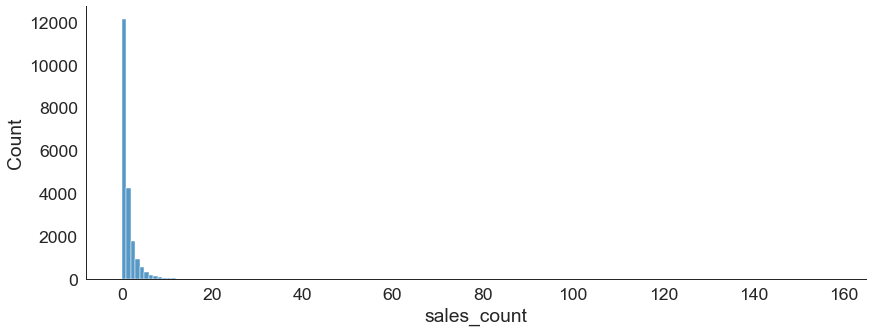

In [168]:
sns.displot(
    data=data,
    bins=max(data),
    aspect=2.5
)

In [169]:
data = data[data <= 10]  # select a cut-off to remove outliers

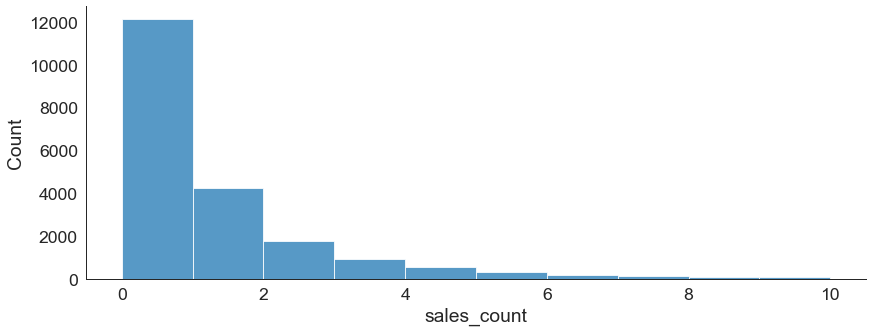

In [170]:
sns.displot(
    data=data,
    bins=max(data),
    aspect=2.5
)

In [143]:
data.describe()

count    20481.00000
mean         0.89312
std          1.55459
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max         10.00000
Name: sales_count, dtype: float64

## Fit Poisson distribution

Since the number of sales is a discrete variable, this limit our scope to discrete distributions

The most relevant discrete distribution is the Poisson distribution, which expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

The Poisson random variable counts the number of successes in independent Bernoulli trials in the limit as and  where the probability of success in each trial is and is a constant. It can be used to approximate the Binomial random variable or in its own right to count the number of events that occur in the interval for a process satisfying certain “sparsity” constraints.

In [145]:
 # maximum likelihood estimate
res = scipy.stats.fit(scipy.stats.poisson, data, bounds=[(0, max(data))])
res

  params: FitParams(mu=0.8931204271044042, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'

In [146]:
res.params.mu, res.nllf()  # negative log likelihood

(0.8931204271044042, 31455.90339510514)

In [147]:
fit = pd.Series(range(max(data) + 1))
fit = fit.apply(lambda x: scipy.stats.poisson.pmf(x, res.params.mu))
fit

0     4.093763e-01
1     3.656224e-01
2     1.632724e-01
3     4.860731e-02
4     1.085304e-02
5     1.938615e-03
6     2.885695e-04
7     3.681818e-05
8     4.110384e-06
9     4.078964e-07
10    3.643006e-08
dtype: float64

<Axes: xlabel='sales_count', ylabel='Density'>

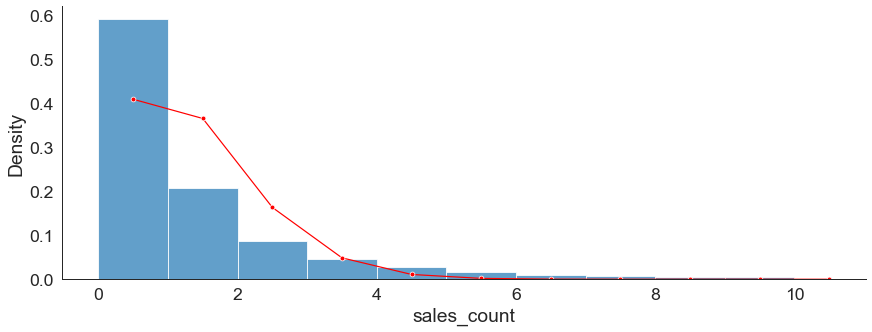

In [172]:
sns.displot(
    data=data,
    stat="density",
    bins=max(data),
    aspect=2.5,
    alpha=0.7
)
sns.lineplot(
    x=fit.index + 0.5,
    y=fit.values,
    color="red",
    marker="o",
)

The Poisson Distribution is a statistical tool that has advantages and disadvantages when used for data analysis. One of the major benefits of using this distribution model is its simplicity, especially when dealing with discrete events such as counts or occurrences.

Additionally, Poisson Distribution provides an accurate representation of rare events that occur randomly over time. It can also be used to predict future events based on past observations.

However, one disadvantage of using Poisson Distribution is its assumption that the mean and variance are equal. This may not always hold true in real-world scenarios where there may be changes in the underlying process.

Furthermore, it’s important to note that Poisson Distribution assumes independence between intervals or periods which might not always apply in practice.

Another potential drawback of using Poisson Distribution arises from limitations inherent to statistical modeling itself – it cannot account for all possible factors influencing data outcomes. Therefore, additional testing methods must often be employed alongside it to ensure reliable results.